In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
from matplotlib import rc


In [2]:
from matplotlib import rc

rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{tgheros} \usepackage{sansmath} \sansmath \usepackage{siunitx} \sisetup{locale = UK, detect-all}"



In [3]:
class colloid:
    def __init__(self, name, apc, hamaker):
        self.name = name
        self.apc = apc
        self.hamaker = hamaker

oav_obj = colloid('Oleic acid vesicle', 0.62, 0.7e-20)
cps_obj = colloid('Carboxylate-modified polystyrene', -0.6409, 1.4e-20)
pt_obj = colloid('Platinum', 1.795332e16, 24.5e-20)
pt_citrate_obj = colloid('Platinum, citrate-capped', 0.16/2.6, 24.5e-20)
# print(oav_obj.name,oav_obj.apc,oav_obj.hamaker)

In [4]:
## estimate surface potential from known surface charge density
## Grahame Equation 14.30 Israelachvili, relates surface charge density and surface potential
## remember to add negative sign for potential if negatively charged!
# quantities
C = 6.241e18 # protons per coulomb
Cm = 0.16 # conversion factor; 1 C m^-2 = 1 charge per 0.16 nm2

def area_per_charge(psi0, NaCl):
    '''
    Returns area per charge i.e. area in nm^2 per unit charge
    NaCl is in M i.e. moles/litre
    surface_potential in mV 
    '''
    sigma = 0.117 * np.sinh(psi0/51.4)*np.sqrt(NaCl)
    return Cm/sigma

def surface_potential(A_per_charge, NaCl):
    '''
    Returns surface_potential in mV
    NaCl is in M i.e. moles/litre
    A_per_charge is area in nm^2 per unit charge
    '''
    sigma = Cm/A_per_charge
    psi0 = np.arcsinh(sigma/np.sqrt(NaCl)/0.117)*51.4
    return psi0



In [5]:
# ## test that it looks ok


# plt.figure(figsize = (5,4))

# surface_potential(0.62,0.2)
# # area_per_charge(125.43467425283076, 12.5/1000)
# # for psi0 in range(1,152,50):
# #   area_per_charge(psi0, 12.5/1000, quiet=False)


# salt_range = np.linspace(1,1200)
# for psi0 in np.linspace(1,150,4):
#     plt.plot(salt_range, area_per_charge(psi0, salt_range*1e-3),'k',linewidth=0.5)

# plt.plot(salt_range, area_per_charge(125.43467425283076, salt_range*1e-3),linestyle='dotted',color='fuchsia')

# plt.xlim(0,1200)
# plt.ylim(0,100)
# plt.xlabel(r'[NaCl] / mM')
# plt.ylabel(r'Area per charge / \unit{\nano\meter\squared}')
# # plt.legend(["0 mV","25 mV","50 mV","75 mV","100 mV","125 mV"], loc ="upper right",title='Surface potential')


# plt.annotate(r"low $\psi_0$ = less charge density", (25,7.435311642378896),xytext=(25,9), arrowprops=dict(arrowstyle="-",color='gray'))
# plt.annotate(r"high $\psi_0$ = more charge density", (100,0.4595570415591883),xytext=(75, 3), arrowprops=dict(arrowstyle="-",color='gray'))
# plt.annotate(r"GUVs from oleic acid", (12.5,2.1477430013854075),xytext=(12.5, 5), arrowprops=dict(arrowstyle="-",color='gray'))

# # plt.savefig('APC_vs_NaCl.pdf')  
# #apc 0.62 for OAV, 50:50 charge/uncharged
# ## we haven't taken into account salt altering the pKa and hence surface charge density of the vesicles



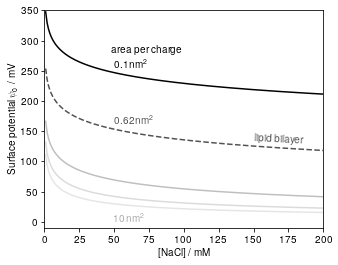

In [6]:
## test that it looks ok

plt.figure(figsize = (5,4))

# surface_potential(0.2,0.150)
# area_per_charge(125, 0.150)

# surface_potential(0.62, 0.075)


salt_range = np.linspace(1,200,200,endpoint=True)
for apc in np.linspace(0.1,10,4):
    plt.plot(salt_range, surface_potential(apc, salt_range*1e-3),'k',alpha=((0.1+1)/(apc+1)))
    
plt.plot(salt_range, surface_potential(oav_obj.apc, salt_range*1e-3),linestyle='dashed',color='k', alpha = ((0.1+1)/(oav_obj.apc+1)))

# for apc in np.arange(0.1,10.1,2):
#   surface_potential(apc, 0.075,quiet=False)

plt.xlim(0,200)

plt.ylim(-10,350)

plt.xlabel(r'[NaCl] / mM')
plt.ylabel(r'Surface potential $\psi_0$ / \unit{\milli\volt}')

plt.annotate(r"\qty{0.1}{\nano\meter\squared}", (50,236.64385151943222),xytext=(50,255))
plt.annotate(r"area per charge", (75,236.64385151943222),xytext=(48,280))

# plt.annotate("0.10 nm$^2 \cdot \mathrm{C}^{-1}$", (75,236.64385151943222),xytext=(120,235))
plt.annotate(r"\qty{0.62}{\nano\meter\squared}", (50,143.05382749361817),xytext=(50,162), alpha = ((0.1+1)/(oav_obj.apc+1)))

plt.annotate("lipid bilayer", (75,143.05382749361817),xytext=(150,130),rotation=-3, alpha = ((0.1+1)/(oav_obj.apc+1)))

plt.annotate(r"\qty{10}{\nano\meter\squared}", (50,29.961280379218667),xytext=(50,0), alpha=((0.1+5)/(10+5)))

plt.savefig('psi0_vs_NaCl.svg', format='svg', dpi=1200,bbox_inches='tight')

#apc 0.62 for OAV, 50:50 charge/uncharged
## we haven't taken into account salt altering the pKa and hence surface charge density of the vesicles


In [7]:
# interaction between identical spheres, undeformed
# equations 14.51 and top of p318 in Israelachvili 3ed for electrostatics
# equation 16.13a for depletion
# vdw p254, p577 (section 21.1) Israelachvili
# p274 Marra (1986a) measured the van der Waals force-law between two uncharged lipid bilayers
# Over the distance regime from 1 to 4 nm the nonretarded Hamaker constant 
# was found to be A = 7e-21 J in pure water, and
# A = 3.1e-21 J in 0.2 M NaCl solution; this is the pure dispersion component
# Table 21.1 describes no adhesion between anionic membranes

## constants
eps0 = 8.854e-12 # permittivity of free space
epsr = 78.4 # relative permittivity of water
k = 1.381e-23 # boltzmans
T = 298. # room temperature 22C
q = 1.602e-19 # elementary charge
Na = 6.022e23 # avogadro
A_disp = 3.1e-21 # in J; dispersion component of Hamaker constant
A_0 = 4.5e-21 # in J; zero frequency component of Hamaker constant

def welec(Ds, salt, R0, apc, A):
    kappa = np.sqrt(eps0*epsr*k*T/(q**2*Na*2000*salt))**-1
#     print(kappa)
    #  print('debye length:', kappa**-1)
    #  gam = np.tanh(q*psi0/(4*k*T))
    #  print('gamma:', gam)
    #  w_elec = 4.61e-11*R0*gam**2*np.exp(-kappa*Ds)
    psi0 = surface_potential(apc, salt)
    w_elec = 4.61e-11*R0*(np.tanh(psi0/103))**2*np.exp(-kappa*Ds)
    return(w_elec)

def wvdw(Ds, salt, R0, apc, A):
    kappa = np.sqrt(eps0*epsr*k*T/(q**2*Na*2000*salt))**-1
    if A == 0:
        A = A_0*np.exp(-kappa*Ds) + A_disp # Equation 13.30, Israelachvili
    #  print(A)
    w_vdw = -A*R0/12/Ds
    #  print(rhov*Na*4*np.pi/3.*Rg**3)
    return(w_vdw)


def wtot(Ds, salt, R0, apc, A):
    """
    salt is in M
    Ds is the distance in metres
    R0 is the radius in metres
    apc is the area per charge in nm^2
    A is the Hamaker constant in J
    """
    return(welec(Ds, salt, R0, apc, A)+
           wvdw(Ds, salt, R0, apc,  A))

print(surface_potential(0.62,0.2))

118.16985146737115


In [8]:

# def I_system(bicine,OA):
#     I = ((1/2) * (((bicine)*(0.5)*(-1)**2) + # Bicine
#             ((bicine)*(0.5)*(+1)**2) +
             
#             ((0.038*(bicine/0.1))*(1)*(-1)**2) + # NaOH from buffer
#             ((0.038*(bicine/0.1))*(1)*(+1)**2)+
             
#             ((OA*0.15)*(0.5)*(-1)**2) + # free oleate and H+ from oleic acid
#             ((OA*0.15)*(0.5)*(+1)**2)+
             
#             ((0.0075*(OA/5e-3))*(1)*(-1)**2) + # NaOH from micelles
#             ((0.0075*(OA/5e-3))*(1)*(+1)**2)))
#     return I


# def debye_length(bicine,OA):
#     kappa = (np.sqrt(eps0*epsr*k*T/(2*1000*Na*(q**2)* I_system(bicine,OA))))**-1
#     return 1/kappa

# # print(debye_length(0.1,5e-3))
# plt.figure(figsize = (5,4))
# for bicine_conc in [0.01,0.05,0.10,0.15,0.20,0.25,0.30]:
#     plt.scatter(x=bicine_conc,y=debye_length(bicine_conc,5e-3)*1e9,color='k')
    
# plt.ylabel(r"Debye length $\kappa^{-1}$ / \unit{\nano\meter}")
# plt.xlabel("[Bicine] / M")
    


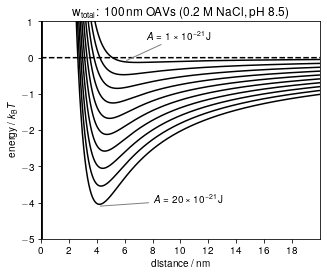

In [9]:
# 1 µm diameter vesicle at various Hamaker constants
## define an array of distances, d
d = np.linspace(0.00001,80,1000000)*1e-9
plt.figure(figsize = (5,4))

# print(min(wtot(d, 0.10, 1e-6, 0.62, A=10e-21))/k/T)

for As in np.linspace(1e-21,20e-21,10,endpoint=True):
    """
    salt is in M
    Ds is the distance in metres
    R0 is the radius in metres
    apc is the area per charge in nm^2
    A is the Hamaker constant in J
    """
    ws = wtot(d, 0.2, (100e-9)/2, oav_obj.apc, A=As) # 1 µm diameter vesicle
    plt.plot(d*1e9, ws/k/T,'k')
    # print(As, wtot(6e-9, 0.15, 1e-6, 0.62, A=As)/k/T)

plt.xlim(0,20)
plt.ylim(-5,1)
plt.xlabel(r'distance / \unit{\nano\meter}')
plt.ylabel(r'energy / $k_{\mathrm{B}}T$')

plt.xticks(np.arange(0, 20, 2.0))

plt.annotate(r"$A$ = \qty{1e-21}{\joule}", (6,-0.1),xytext=(7.5,0.5), arrowprops=dict(arrowstyle="-",color='gray'))
plt.annotate(r"$A$ = \qty{20e-21}{\joule}", (4.1,-4.1),xytext=(8,-4), arrowprops=dict(arrowstyle="-",color='gray'))

plt.title(r'$\mathrm{w_{total}}$: \qty{100}{\nano\meter} OAVs (0.2 M NaCl, pH 8.5)')

plt.plot(d*1e9, d**0*0, 'k--') # plot where 0 is


plt.savefig('200mM pH8pt5_no_sep.pdf', format='pdf', dpi=1200,bbox_inches='tight')
# plt.savefig('200mM pH8pt5.eps', format='eps', dpi=1200,bbox_inches='tight')


#caption: negative = attraction; positive = repulsion


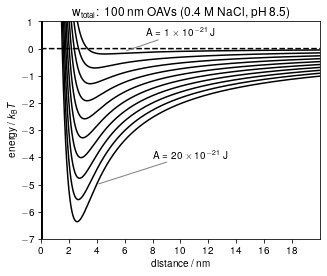

In [10]:
# 1 µm diameter vesicle at various Hamaker constants
## define an array of distances, d
d = np.linspace(0.00001,80,1000000)*1e-9
plt.figure(figsize = (5,4))

# print(min(wtot(d, 0.10, 1e-6, 0.62, A=10e-21))/k/T)

for As in np.linspace(1e-21,20e-21,10,endpoint=True):
    """
    salt is in M
    Ds is the distance in metres
    R0 is the radius in metres
    apc is the area per charge in nm^2
    A is the Hamaker constant in J
    """
    ws = wtot(d, 0.4, (100e-9)/2, oav_obj.apc, A=As) # 1 µm diameter vesicle
    plt.plot(d*1e9, ws/k/T,'k')
    # print(As, wtot(6e-9, 0.15, 1e-6, 0.62, A=As)/k/T)

plt.xlim(0,20)
plt.ylim(-7,1)
plt.xlabel('distance / nm')
plt.ylabel(r'energy / $k_{\mathrm{B}}T$')

plt.xticks(np.arange(0, 20, 2.0))

plt.annotate(r"A = 1 $\times \, 10^{-21}$ J", (6,-0.1),xytext=(7.5,0.5), arrowprops=dict(arrowstyle="-",color='gray'))
plt.annotate(r"A = 20 $\times \, 10^{-21}$ J", (4,-5),xytext=(8,-4), arrowprops=dict(arrowstyle="-",color='gray'))

plt.title('$\mathrm{w_{total}}$: 100 nm OAVs (0.4 M NaCl, pH 8.5)')

plt.plot(d*1e9, d**0*0, 'k--') # plot where 0 is


# plt.savefig('400mM pH8pt5.png', format='png', dpi=1200,bbox_inches='tight')

#caption: negative = attraction; positive = repulsion


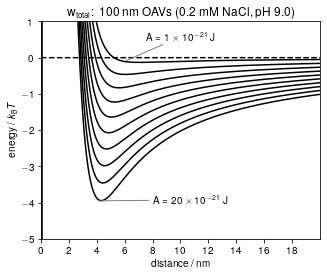

In [11]:
# 1 µm diameter vesicle at various Hamaker constants
## define an array of distances, d
d = np.linspace(0.00001,80,1000000)*1e-9
plt.figure(figsize = (5,4))

# print(min(wtot(d, 0.10, 1e-6, 0.62, A=10e-21))/k/T)

for As in np.linspace(1e-21,20e-21,10,endpoint=True):
    """
    salt is in M
    Ds is the distance in metres
    R0 is the radius in metres
    apc is the area per charge in nm^2
    A is the Hamaker constant in J
    """
    ws = wtot(d, 0.2, (100e-9)/2, 0.4133, A=As) # 1 µm diameter vesicle
    plt.plot(d*1e9, ws/k/T,'k')
    # print(As, wtot(6e-9, 0.15, 1e-6, 0.62, A=As)/k/T)

plt.xlim(0,20)
plt.ylim(-5,1)
plt.xlabel('distance / nm')
plt.ylabel(r'energy / $k_{\mathrm{B}}T$')

plt.xticks(np.arange(0, 20, 2.0))

plt.annotate(r"A = 1 $\times \, 10^{-21}$ J", (6,-0.1),xytext=(7.5,0.5), arrowprops=dict(arrowstyle="-",color='gray'))
plt.annotate(r"A = 20 $\times \, 10^{-21}$ J", (4.1,-3.95),xytext=(8,-4), arrowprops=dict(arrowstyle="-",color='gray'))

plt.title('$\mathrm{w_{total}}$: 100 nm OAVs (0.2 mM NaCl, pH 9.0)')

plt.plot(d*1e9, d**0*0, 'k--') # plot where 0 is


# plt.savefig('200mM pH9.png', format='png', dpi=1200,bbox_inches='tight')
#caption: negative = attraction; positive = repulsion


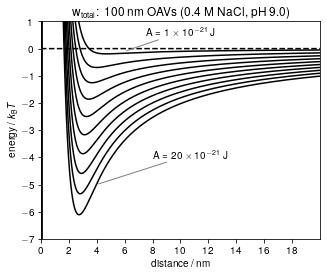

In [12]:
# 1 µm diameter vesicle at various Hamaker constants
## define an array of distances, d
d = np.linspace(0.00001,80,1000000)*1e-9
plt.figure(figsize = (5,4))

# print(min(wtot(d, 0.10, 1e-6, 0.62, A=10e-21))/k/T)

for As in np.linspace(1e-21,20e-21,10,endpoint=True):
    """
    salt is in M
    Ds is the distance in metres
    R0 is the radius in metres
    apc is the area per charge in nm^2
    A is the Hamaker constant in J
    """
    ws = wtot(d, 0.4, (100e-9)/2, 0.4133, A=As) # 1 µm diameter vesicle
    plt.plot(d*1e9, ws/k/T,'k')
    # print(As, wtot(6e-9, 0.15, 1e-6, 0.62, A=As)/k/T)

plt.xlim(0,20)
plt.ylim(-7,1)
plt.xlabel('distance / nm')
plt.ylabel(r'energy / $k_{\mathrm{B}}T$')

plt.xticks(np.arange(0, 20, 2.0))

plt.annotate(r"A = 1 $\times \, 10^{-21}$ J", (6,-0.1),xytext=(7.5,0.5), arrowprops=dict(arrowstyle="-",color='gray'))
plt.annotate(r"A = 20 $\times \, 10^{-21}$ J", (4,-5),xytext=(8,-4), arrowprops=dict(arrowstyle="-",color='gray'))

plt.title('$\mathrm{w_{total}}$: 100 nm OAVs (0.4 M NaCl, pH 9.0)')

plt.plot(d*1e9, d**0*0, 'k--') # plot where 0 is


# plt.savefig('400mM pH9.png', format='png', dpi=1200,bbox_inches='tight')

#caption: negative = attraction; positive = repulsion


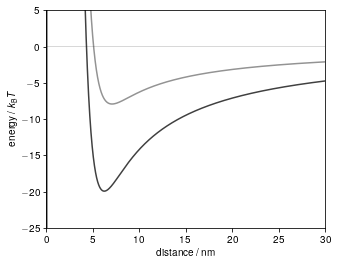

In [13]:
# 5 µm diameter vesicle at various Hamaker constants
## define an array of distances, d
d = np.linspace(0.00001,80,1000000)*1e-9
plt.figure(figsize = (5,4))

# print(min(wtot(d, 0.10, 1e-6, 0.62, A=10e-21))/k/T)

for As in np.linspace(3.1e-21,7e-21,2):
    ws = wtot(d, 0.15, (2e-6)/2, oav_obj.apc, A=As) # 5 µm diameter vesicle
    """
    salt is in M
    Ds is the distance in metres
    R0 is the radius in metres
    apc is the area per charge in nm^2
    A is the Hamaker constant in J
    """
    plt.plot(d*1e9, ws/k/T,zorder=3,color='k',alpha=abs((As+2e-21)/(12e-21)))
    # print(As, wtot(6e-9, 0.15, 1e-6, 0.62, A=As)/k/T)

plt.xlim(0,30)
plt.ylim(-25,5)
plt.xlabel('distance / nm')
plt.ylabel(r'energy / $k_{\mathrm{B}}T$')

# plt.annotate(r"A = 1 $\times \, 10^{-21}$ J", (7.45,-5),xytext=(10,-1),alpha=0.8,zorder=2)
# plt.annotate(r"A = 10 $\times \, 10^{-21}$ J", (7.45,-60),xytext=(9,-60),zorder=2)

plt.plot(d*1e9, d**0*0, 'k-',alpha=0.5,linewidth=0.3,zorder=1)

# plt.savefig('w_vs_d_hamakers.svg', format='svg', dpi=1200,bbox_inches='tight')

#caption: negative = attraction; positive = repulsion


# New section

In [14]:
# interaction between particle and vesicle
## Israelachvilia Ch 14.18
## elec: two flat surfaces equation 14.61
## vdw: mix hamaker constants A with equation 13.31 and 13.35
## Table 13.3 in water: A polystyrene ~ 1.4 x 10^-20 J (or 9.1 x 10^-21 Galli 2020); A platinum ~ 245e-21 J (Lacasa 2018); A gold = 2.5e-19 J, = 4.1e-19 J (Biggs and Mulvaney 1994) 


## object 1 is vesicle
## object 2 is the particle
A12 = np.sqrt(oav_obj.hamaker * cps_obj.hamaker) # Equation 13.32, Israelachvili
A12_metal = np.sqrt(oav_obj.hamaker * pt_obj.hamaker)

print('Hamaker vesicle-PS:', A12)
print('Hamaker vesicle-metal:', A12_metal)

def welec12(Ds, salt, apc1, apc2, R1, R2, A):
    kappa = np.sqrt(eps0*epsr*k*T/(q**2*Na*2000*salt))**-1
    psi1 = surface_potential(apc1, salt)
    psi2 = surface_potential(apc2, salt)
    w_elec = -eps0*epsr*kappa*(2*psi1*psi2-(psi1**2+psi2**2))*np.exp(-kappa*Ds)/(np.exp(kappa*Ds)-np.exp(-kappa*Ds))
    return(w_elec)

def wvdw12(Ds, salt, apc1, apc2, R1, R2, A):
    kappa = np.sqrt(eps0*epsr*k*T/(q**2*Na*2000*salt))**-1
    w_vdw = -A*R1*R2/(R1+R2)/6/Ds
    ## what do we do about the zero and higher frequency contributions for metals and PS?
    return(w_vdw)

def wtot12(Ds, salt, apc1, apc2, R1, R2, A):
    """
    salt is in M
    Ds is the distance in metres
    apc1/2 is the area per charge in nm^2; vesicle 1 particle 2
    R1 is the radius of the vesicle in metres
    R2 is the radius of the particle in metres
    """
    return(welec12(Ds, salt, apc1, apc2, R1, R2, A)+
           wvdw12(Ds, salt, apc1, apc2, R1, R2, A))


Hamaker vesicle-PS: 9.899494936611666e-21
Hamaker vesicle-metal: 4.141255848169731e-20


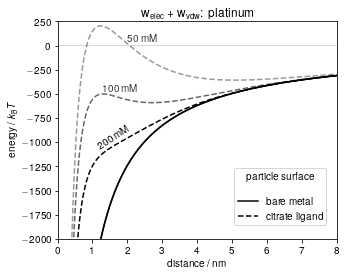

In [15]:
# Platinum - Platinum
# For citrate particles, 0.16 nm2 per citrate. Each citrate on average has 2.6 deprotonation state (so apc = 0.16/2.6)
# from datetime import datetime
# start_time = datetime.now()

d = np.linspace(0.000000000001,50,10000)*1e-9
plt.figure(figsize = (5,4))

count = 0

# salt_list = (0.01,0.05,0.1,0.2)
# for i in salt_list:
#   ws = wtot12(d, i, 0.6409, 0.6409, (1e-6)/2, (1e-6)/2, A=1.4e-20)
#   plt.plot(d*1e9, ws/k/T)


# plt.legend(["0.05 M","0.25 M","0.50 M","0.75 M","1.00 M"], loc ="lower right",title='[NaCl]')
# ax = plt.gca()
# leg = ax.get_legend()

for salts in np.array([0.2,0.1,0.05]):
    ws_bare = wtot(d, salts, (1e-6)/2, pt_obj.apc, A=pt_obj.hamaker)
    ws_citrate = wtot(d, salts, (1e-6)/2, pt_citrate_obj.apc, A=pt_obj.hamaker)

    """
    salt is in M
    Ds is the distance in metres
    R0 is the radius in metres
    apc is the area per charge in nm^2
    A is the Hamaker constant in J
    """
    plt.plot(d*1e9, ws_bare/k/T,'k',alpha=abs(salts/0.250)+0.2)
    plt.plot(d*1e9, ws_citrate/k/T,'k',alpha=abs(salts/0.250)+0.2,linestyle='dashed')





# for i in (0.05,0.25,0.50,0.75,1.00):
#   for r in np.linspace(5e-6,10e-6,3):
#       ws = wtot12(d, i, 0.62, 1, r, 0.5e-6, A=A12_metal)
#       plt.plot(d*1e9, ws/k/T, 'tab:gray')

# plt.plot(d*1e9, d**0*0, 'k--')

plt.xlim(0,8)
plt.ylim(-2000,250)
plt.xlabel('distance / nm')
plt.ylabel(r'energy / $k_{\mathrm{B}}T$')
plt.title('$\mathrm{w_{elec}} + \mathrm{w_{vdw}}$: platinum')
plt.plot(d*1e9, d**0*0, 'k-',alpha=0.5,linewidth=0.3,zorder=1)


plt.annotate(r"50 mM", (3,100),xytext=(2,40),alpha=(0.8))
plt.annotate(r"100 mM", (6,-24),xytext=(1.3,-475),alpha=(0.8))
plt.annotate(r"200 mM", (6,-24),xytext=(1.1,-1075), rotation=33)

plt.legend(["bare metal","citrate ligand"], loc ="lower right",bbox_to_anchor=(0.98, 0.04),title='particle surface \n')

# plt.savefig('DLVO_platinum.svg', format='svg', dpi=1200,bbox_inches='tight')

#vesicle-vesicle plot
#vesicle-particle plot



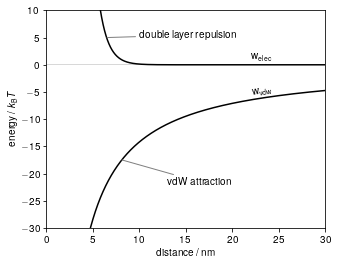

In [16]:
# Carboxylate PS - Carboxylate PS
d = np.linspace(0.00001,80,1000000)*1e-9
plt.figure(figsize = (5,4))

count = 0
A_PS = 1.4e-20 # in water. A = 6.5e-20 J when not in intervening medium
# salt_list = (0.01,0.05,0.1,0.2)
# for i in salt_list:
#   ws = wtot12(d, i, 0.6409, 0.6409, (1e-6)/2, (1e-6)/2, A=1.4e-20)
#   plt.plot(d*1e9, ws/k/T)


# plt.legend(["0.05 M","0.25 M","0.50 M","0.75 M","1.00 M"], loc ="lower right",title='[NaCl]')
# ax = plt.gca()
# leg = ax.get_legend()
R = (1e-6)/2



for salt in np.array([0.1]):
    w_vdw = wvdw(d, salt, R, cps_obj.apc, cps_obj.hamaker)
    plt.plot(d*1e9, w_vdw/k/T,'k')

for salt in np.array([0.1]):
    w_elec = welec(d, salt, R, cps_obj.apc, cps_obj.hamaker)
    plt.plot(d*1e9, w_elec/k/T,'k')

# plt.annotate(r"200 mM", (0.3,1000),xytext=(0.8,500), rotation=-48)
# plt.annotate(r"100 mM", (0.3,1000),xytext=(1.100,750), rotation=-47.5)
# plt.annotate(r"50 mM", (0.3,1000),xytext=(1.45,1075), rotation=-44)

# plt.annotate(r"$\mathrm{w_{vdw}}$", (0.25,-475),xytext=(1,-600),arrowprops=dict(arrowstyle="-",color='k',alpha=0.2))
# plt.annotate(r"$\mathrm{w_{elec}}$", (0.18,2800),xytext=(1,2750))


plt.plot(d*1e9, d**0*0, 'k-',alpha=0.5,linewidth=0.3,zorder=1)
# plt.annotate(r"200 mM", (5.5,1.5),xytext=(1,-4), arrowprops=dict(arrowstyle="-",color='gray'),zorder=2)
# plt.annotate(r"50 mM", (9.8,3),xytext=(13,3),alpha=(0.8), arrowprops=dict(arrowstyle="-",color='gray'),zorder=2)
plt.annotate(r"$\mathrm{w_{elec}}$", (5.5,1.5),xytext=(22,1))
plt.annotate(r"$\mathrm{w_{vdw}}$", (5.5,1.5),xytext=(22,-5.5), rotation=10)
plt.annotate("double layer repulsion", (6.3,5),xytext=(10,5), arrowprops=dict(arrowstyle="-",color='gray'))
plt.annotate("vdW attraction", (7.9,-17.4),xytext=(13,-22), arrowprops=dict(arrowstyle="-",color='gray'))

plt.xlim(0,30)
plt.ylim(-30,10)
# plt.xlim(10,12)
# plt.ylim(0,5)

plt.xlabel('distance / nm')
plt.ylabel(r'energy / $k_{\mathrm{B}}T$')
# plt.title('$\mathrm{w_{elec}}$ \& $\mathrm{w_{vdw}}$: latex beads') 
 
plt.savefig('DLVO_welec_wvdw.pdf', format='pdf', dpi=1200,bbox_inches='tight')



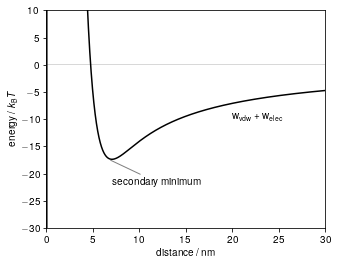

In [17]:
# Carboxylate PS - Carboxylate PS
d = np.linspace(0.00001,80,1000000)*1e-9
plt.figure(figsize = (5,4))

count = 0
A_PS = 1.4e-20 # in water. A = 6.5e-20 J when not in intervening medium
# salt_list = (0.01,0.05,0.1,0.2)
# for i in salt_list:
#   ws = wtot12(d, i, 0.6409, 0.6409, (1e-6)/2, (1e-6)/2, A=1.4e-20)
#   plt.plot(d*1e9, ws/k/T)


# plt.legend(["0.05 M","0.25 M","0.50 M","0.75 M","1.00 M"], loc ="lower right",title='[NaCl]')
# ax = plt.gca()
# leg = ax.get_legend()
R = (1e-6)/2

   
for salt in np.array([0.1]):
    w_tot = w_vdw + w_elec
    plt.plot(d*1e9, w_tot/k/T,'k')
    
# plt.annotate(r"200 mM", (0.3,1000),xytext=(0.8,500), rotation=-48)
# plt.annotate(r"100 mM", (0.3,1000),xytext=(1.100,750), rotation=-47.5)
# plt.annotate(r"50 mM", (0.3,1000),xytext=(1.45,1075), rotation=-44)

# plt.annotate(r"$\mathrm{w_{vdw}}$", (0.25,-475),xytext=(1,-600),arrowprops=dict(arrowstyle="-",color='k',alpha=0.2))
# plt.annotate(r"$\mathrm{w_{elec}}$", (0.18,2800),xytext=(1,2750))


plt.plot(d*1e9, d**0*0, 'k-',alpha=0.5,linewidth=0.3,zorder=1)
# plt.annotate(r"200 mM", (5.5,1.5),xytext=(1,-4), arrowprops=dict(arrowstyle="-",color='gray'),zorder=2)
# plt.annotate(r"50 mM", (9.8,3),xytext=(13,3),alpha=(0.8), arrowprops=dict(arrowstyle="-",color='gray'),zorder=2)
# plt.annotate(r"$\mathrm{w_{elec}}$", (5.5,1.5),xytext=(22,1))
plt.annotate(r"$\mathrm{w_{vdw} + w_{elec}}$", (5.5,1.5),xytext=(20,-10))
plt.annotate("secondary minimum", (6.7,-17.4),xytext=(7,-22), arrowprops=dict(arrowstyle="-",color='gray'))

plt.xlim(0,30)
plt.ylim(-30,10)
# plt.xlim(10,12)
# plt.ylim(0,5)

plt.xlabel('distance / nm')
plt.ylabel(r'energy / $k_{\mathrm{B}}T$')
# plt.title('$\mathrm{w_{elec}}$ \& $\mathrm{w_{vdw}}$: latex beads') 
 
plt.savefig('DLVO_wtotal.pdf', format='pdf', dpi=1200,bbox_inches='tight')



Text(0.5, 1.0, '$\\mathrm{w_{elec}} + \\mathrm{w_{vdw}}$: latex beads')

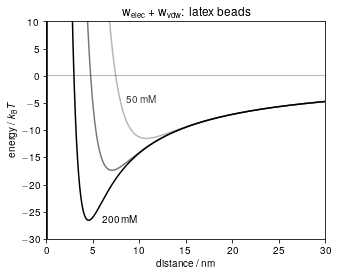

In [18]:
# Carboxylate PS - Carboxylate PS
d = np.linspace(0.00001,80,1000000)*1e-9
plt.figure(figsize = (5,4))
A_PS = 1.4e-20 # in water. A = 6.5e-20 J when not in intervening medium

for salt in np.array([0.2,0.1,0.05]):
    ws = wtot(d, salt, (1e-6)/2, cps_obj.apc, cps_obj.hamaker)
    """
    salt is in M
    Ds is the distance in metres
    R0 is the radius in metres
    apc is the area per charge in nm^2
    A is the Hamaker constant in J
    """
    plt.plot(d*1e9, ws/k/T,'k',alpha=abs(salt/0.21)+0.0475)
  
plt.annotate(r"200 mM", (6,-25),xytext=(6,-27))
plt.annotate(r"50 mM", (6,-5),xytext=(8.5,-5),alpha=(0.8))
plt.plot(d*1e9, d**0*0, 'k-',alpha=0.5,linewidth=0.3,zorder=1) # plot where 0 is


plt.plot(d*1e9, d**0*0, 'k-',alpha=0.5,linewidth=0.3)

plt.xlim(0,30)
plt.ylim(-30,10)


plt.xlabel('distance / nm')
plt.ylabel(r'energy / $k_{\mathrm{B}}T$')
plt.title('$\mathrm{w_{elec}} + \mathrm{w_{vdw}}$: latex beads') 

# plt.savefig('DLVO_latex_wtotal.svg', format='svg', dpi=1200,bbox_inches='tight')


C:\Users\dlwk8\AppData\Local\Temp\ipykernel_25308\1718258575.py:37: RuntimeWarning: divide by zero encountered in true_divide
  w_vdw = -A*R0/12/Ds
C:\Users\dlwk8\AppData\Local\Temp\ipykernel_25308\1718258575.py:37: RuntimeWarning: divide by zero encountered in true_divide
  w_vdw = -A*R0/12/Ds
C:\Users\dlwk8\AppData\Local\Temp\ipykernel_25308\1718258575.py:37: RuntimeWarning: divide by zero encountered in true_divide
  w_vdw = -A*R0/12/Ds
C:\Users\dlwk8\AppData\Local\Temp\ipykernel_25308\1718258575.py:37: RuntimeWarning: divide by zero encountered in true_divide
  w_vdw = -A*R0/12/Ds


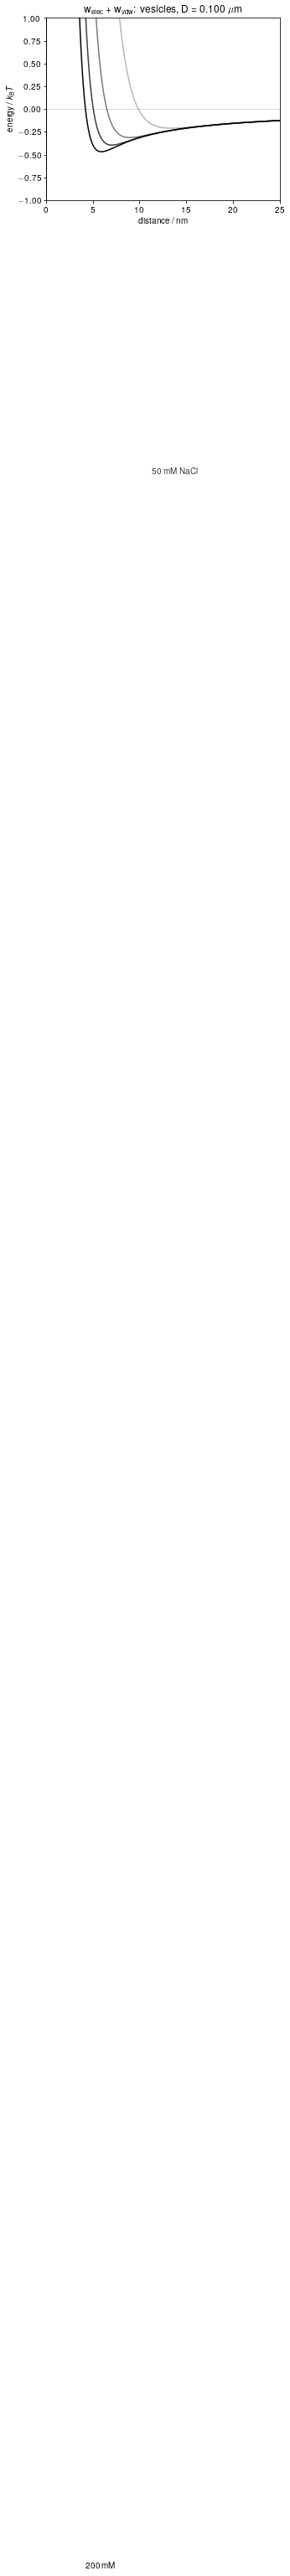

In [19]:
# Vesicle-vesicle, vary salt, fixed radius
## define an array of distances, d


d = np.arange(0,30+1,0.01)*1e-9
plt.figure(figsize = (5,4))

# print(min(wtot(d, 0.10, 1e-6, 0.62, A=10e-21))/k/T)

for salt in np.arange(50,200+1,50)/1000:
    ws = wtot(d, salt, (0.1e-6)/2, oav_obj.apc, A=0)
    """
    salt is in M
    Ds is the distance in metres
    R0 is the radius in metres
    apc is the area per charge in nm^2
    A is the Hamaker constant in J
    """
    plt.plot(d*1e9, ws/k/T,'k',alpha=abs(salt/0.21)+0.0475,zorder=2)
    # print(As, wtot(6e-9, 0.15, 1e-6, 0.62, A=As)/k/T)


plt.xlim(0,25)
plt.ylim(-1,1)
plt.xlabel('distance / nm')
plt.ylabel(r'energy / $k_{\mathrm{B}}T$')
plt.title('$\mathrm{w_{elec}} + \mathrm{w_{vdw}}$: vesicles, D = 0.100 $\mu$m') 

plt.annotate(r"200 mM", (0,0),xytext=(4.2,-27))
plt.annotate(r"50 mM NaCl", (0,0),xytext=(11.3,-4),alpha=(0.8))
plt.plot(d*1e9, d**0*0, 'k-',alpha=0.5,linewidth=0.3,zorder=1) # plot where 0 is


# plt.savefig('DLVO_vesicles_salts_5µm_diameter.svg', format='svg', dpi=1200,bbox_inches='tight')

#caption: negative = attraction; positive = repulsion
# timing_with_time()

# print(welec12(Ds, salt, apc1, apc2, R1, R2, A))
# print(wvdw12(Ds, salt, apc1, apc2, R1, R2, A))

C:\Users\dlwk8\AppData\Local\Temp\ipykernel_25308\1718258575.py:37: RuntimeWarning: divide by zero encountered in true_divide
  w_vdw = -A*R0/12/Ds
C:\Users\dlwk8\AppData\Local\Temp\ipykernel_25308\1718258575.py:37: RuntimeWarning: divide by zero encountered in true_divide
  w_vdw = -A*R0/12/Ds
C:\Users\dlwk8\AppData\Local\Temp\ipykernel_25308\1718258575.py:37: RuntimeWarning: divide by zero encountered in true_divide
  w_vdw = -A*R0/12/Ds
C:\Users\dlwk8\AppData\Local\Temp\ipykernel_25308\1718258575.py:37: RuntimeWarning: divide by zero encountered in true_divide
  w_vdw = -A*R0/12/Ds
C:\Users\dlwk8\AppData\Local\Temp\ipykernel_25308\1718258575.py:37: RuntimeWarning: divide by zero encountered in true_divide
  w_vdw = -A*R0/12/Ds


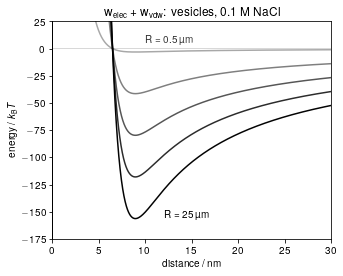

In [20]:
# Vesicle-vesicle: fixed salt, vary radius
## define an array of distances, d

d = np.arange(0,30+1,0.01)*1e-9
plt.figure(figsize = (5,4))

for diameter in np.linspace(1,50,5)/(1e6):
    ws = wtot(d, 0.1, diameter/2, oav_obj.apc, A=0)
    """
    salt is in M
    Ds is the distance in metres
    R0 is the radius in metres
    apc is the area per charge in nm^2
    A is the Hamaker constant in J
    """
    plt.plot(d*1e9, ws/k/T,'k',alpha=(diameter+(25e-6))/(76e-6),zorder=3)

plt.xlim(0,30)
plt.ylim(-175,25)
plt.xlabel(r'distance / \unit{\nano\meter}')
plt.ylabel(r'energy / $k_{\mathrm{B}}T$')
plt.title(r'$\mathrm{w_{elec}} + \mathrm{w_{vdw}}$: vesicles, 0.1 M NaCl') 

plt.annotate(r'R = \SI{0.5}{\micro\meter}', (8.75,-3.2),xytext=(10,6),alpha=(0.8),zorder=2)
plt.annotate(r'R = \SI{25}{\micro\meter}', (9,-160),xytext=(12,-155),zorder=2)

plt.plot(d*1e9, d**0*0, 'k-',alpha=0.5,linewidth=0.3,zorder=1) # plot where 0 is


# plt.savefig('DLVO_vesicles_sizes.svg', format='svg', dpi=1200,bbox_inches='tight')

#caption: negative = attraction; positive = repulsion


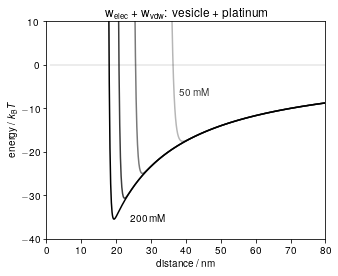

In [21]:
# Vesicle-platinum, vary salt, fixed radius
## define an array of distances, d

d = np.arange(1,80+1,0.1)*1e-9

plt.figure(figsize = (5,4))

# print(min(wtot(d, 0.10, 1e-6, 0.62, A=10e-21))/k/T)

for salt in np.arange(50,200+1,50)/1000:
    ws = wtot12(d, salt, oav_obj.apc, pt_obj.apc, (5e-6)/2, (1e-6)/2, A=A12_metal)
    """
    salt is in M
    Ds is the distance in metres
    R0 is the radius in metres
    apc is the area per charge in nm^2
    A is the Hamaker constant in J
    """
    plt.plot(d*1e9, ws/k/T,'k',alpha=abs(salt/0.21)+0.0475,zorder=3)
    # print(As, wtot(6e-9, 0.15, 1e-6, 0.62, A=As)/k/T)

plt.xlim(0,80)
plt.ylim(-40,10)
plt.xlabel('distance / nm')
plt.ylabel(r'energy / $k_{\mathrm{B}}T$')
plt.title('$\mathrm{w_{elec}} + \mathrm{w_{vdw}}$: vesicle + platinum') 

plt.annotate(r"50 mM", (6,-24),xytext=(38,-7),alpha=(0.8))
plt.annotate(r"200 mM", (6,-24),xytext=(24,-36))
plt.plot(d*1e9, d**0*0, 'k-',alpha=0.5,linewidth=0.3,zorder=1) # plot where 0 is


# plt.savefig('DLVO_vesicle_platinum.svg', format='svg', dpi=1200,bbox_inches='tight')

#caption: negative = attraction; positive = repulsion


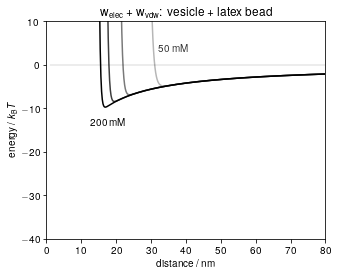

In [22]:
# Vesicle-latex, vary salt, fixed radius
## define an array of distances, d

d = np.arange(1,80+1,0.1)*1e-9
plt.figure(figsize = (5,4))

# print(min(wtot(d, 0.10, 1e-6, 0.62, A=10e-21))/k/T)

for salt in np.arange(50,200+1,50)/1000:
    ws = wtot12(d, salt, oav_obj.apc, cps_obj.apc*(-1), (5e-6)/2, (1e-6)/2, A=A12)
    """
    salt is in M
    Ds is the distance in metres
    R0 is the radius in metres
    apc is the area per charge in nm^2
    A is the Hamaker constant in J
    """
    plt.plot(d*1e9, ws/k/T,'k',alpha=abs(salt/0.21)+0.0475,zorder=3)
    # print(As, wtot(6e-9, 0.15, 1e-6, 0.62, A=As)/k/T)

plt.xlim(0,80)
plt.ylim(-40,10)
plt.xlabel('distance / nm')
plt.ylabel(r'energy / $k_{\mathrm{B}}T$')
plt.title('$\mathrm{w_{elec}} + \mathrm{w_{vdw}}$: vesicle + latex bead') 

plt.annotate("50 mM", (6,0),xytext=(32,3),alpha=(0.8))
plt.annotate("200 mM", (6,0),xytext=(12.5,-14))
plt.plot(d*1e9, d**0*0, 'k-',alpha=0.5,linewidth=0.3,zorder=1) # plot where 0 is


# plt.savefig('DLVO_vesicle_latex.svg', format='svg', dpi=1200,bbox_inches='tight')

#caption: negative = attraction; positive = repulsion


In [23]:
# carboxylate-modified polystyrene latex beads
# density: 1.050 g/mL

# The refractive index at 589 nm for polystyrene is 1.5905; and 1.602 at 486 nm. https://www.sigmaaldrich.com/deepweb/assets/sigmaaldrich/product/documents/817/733/lb11pis.pdf
# area per charge: 30 - 300 square-Angstroms per C (0.30 - 3.00 square-nm per Coulomb). https://www.sigmaaldrich.com/deepweb/assets/sigmaaldrich/product/documents/166/102/l0655pis.pdf
# charge per area 0.33 - 3.33 Coulombs per square-nm
# apc = 0.6409 square-nm per Coulomb (= 1.5 Coulomb per square-nm) (Assemi 2006)

56.2  nm, citrate
welec =  5.10e-22
wvdw =  -5.41e-21
wtot =  -4.90e-21
56.2  nm, bare
welec =  6.70e-22
wvdw =  -5.41e-21
wtot =  -4.74e-21

5.6  nm, citrate
welec =  5.10e-22
wvdw =  -6.71e-22
wtot =  -1.61e-22
5.6  nm, bare
welec =  6.70e-22
wvdw =  -6.71e-22
wtot =  -1.80e-24



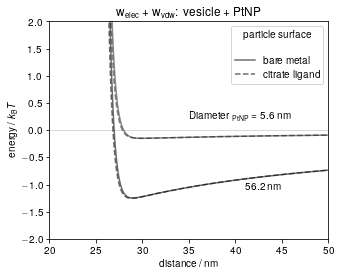

In [24]:
# PtNPs with 100 nm OAV under 0.1 M NaCl.
# The two curves (bare metal and citrate-capped) overlap perfectly


# Vesicle (100 nm diameter) - platinum nanoparticles (3 different PtNP sizes). experimental particles were citrate-capped.
# 0.16 nm2 per citrate (Sebastian Franco-Ulloa 2020, 'Dispersion state phase diagram of citrate-coated metallic nanoparticles in saline solutions')
# citrate ligands also stabilise nanoparticles by sterics: the area of the particle which is bare metal shrinks from 100% to roughly 70%, however this isn't reflected in the DLVO plots
# For citrate particles, 0.16 nm2 per citrate. Each citrate on average has 2.6 deprotonation state (so apc = 0.16/2.6)
# higher frequency component is weak due to high curvature of the small particles

## define an array of distances, d


d = np.arange(0.1,100+1,0.01)*1e-9

plt.figure(figsize = (5,4))

# print(min(wtot(d, 0.10, 1e-6, 0.62, A=10e-21))/k/T)

for ptnp_diameter in np.array([56.2,5.6])/(1e9):
    ws_citrate = wtot12(d, 0.1, oav_obj.apc, pt_citrate_obj.apc, 100e-9, ptnp_diameter/2, A=A12_metal)
    ws_bare = wtot12(d, 0.1, oav_obj.apc, pt_obj.apc, 100e-9, ptnp_diameter/2, A=A12_metal)
    
    #citrate
    print(ptnp_diameter*10**9, ' nm, citrate')
    welec_cit = welec12(28e-9, 0.1, oav_obj.apc, pt_citrate_obj.apc, 100e-9, ptnp_diameter/2, A=A12_metal)
    wvdw_cit = wvdw12(28e-9, 0.1, oav_obj.apc, pt_citrate_obj.apc, 100e-9, ptnp_diameter/2, A=A12_metal)
    print('welec = ', f'{welec_cit:.2e}')
    print('wvdw = ', f'{wvdw_cit:.2e}')
    print('wtot = ', f'{welec_cit + wvdw_cit:.2e}')
    
    #bare
    print(ptnp_diameter*10**9, ' nm, bare')
    welec_bare = welec12(28e-9, 0.1, oav_obj.apc, pt_obj.apc, 100e-9, ptnp_diameter/2, A=A12_metal)
    wvdw_bare = wvdw12(28e-9, 0.1, oav_obj.apc, pt_obj.apc, 100e-9, ptnp_diameter/2, A=A12_metal)
    print('welec = ', f'{welec_bare:.2e}')
    print('wvdw = ', f'{wvdw_bare:.2e}')
    print('wtot = ', f'{welec_bare + wvdw_bare:.2e}')
    print()
    """
    salt is in M
    Ds is the distance in metres
    R0 is the radius in metres
    apc is the area per charge in nm^2
    A is the Hamaker constant in J
    """
    plt.plot(d*1e9, ws_bare/k/T,'k',alpha=abs((ptnp_diameter + 230e-9)/500e-9),zorder=3)
    plt.plot(d*1e9, ws_citrate/k/T,'k',alpha=abs((ptnp_diameter + 230e-9)/500e-9),linestyle='dashed',zorder=3)

    # print(As, wtot(6e-9, 0.15, 1e-6, 0.62, A=As)/k/T)


plt.xlim(20,50)

plt.ylim(-2,2)
plt.xlabel('distance / nm')
plt.ylabel(r'energy / $k_{\mathrm{B}}T$')
plt.title('$\mathrm{w_{elec}} + \mathrm{w_{vdw}}$: vesicle + PtNP') 

plt.annotate(r"Diameter $_{\mathrm{PtNP}}$ = 5.6 nm", (35,0.2))
plt.annotate(r"56.2 nm", (40,-1.1),xytext=(41,-1.1))
# plt.annotate(r"129 nm", (40,-3),xytext=(40,-3))

plt.plot(d*1e9, d**0*0, 'k-',alpha=0.5,linewidth=0.3,zorder=1) # plot where 0 is
plt.legend(["bare metal","citrate ligand"], loc ="upper right",bbox_to_anchor=(1, 1),title='particle surface \n')

# plt.savefig('DLVO_vesicle_PtNP.svg', format='svg', dpi=1200,bbox_inches='tight')

#caption: negative = attraction; positive = repulsion


257.2  nm, citrate
welec =  5.10e-22
wvdw =  -8.87e-21
wtot =  -8.36e-21
257.2  nm, bare
welec =  6.70e-22
wvdw =  -8.87e-21
wtot =  -8.21e-21

51.3391  nm, citrate
welec =  5.10e-22
wvdw =  -4.18e-21
wtot =  -3.67e-21
51.3391  nm, bare
welec =  6.70e-22
wvdw =  -4.18e-21
wtot =  -3.51e-21

4.2374  nm, citrate
welec =  5.10e-22
wvdw =  -5.01e-22
wtot =  9.20e-24
4.2374  nm, bare
welec =  6.70e-22
wvdw =  -5.01e-22
wtot =  1.69e-22



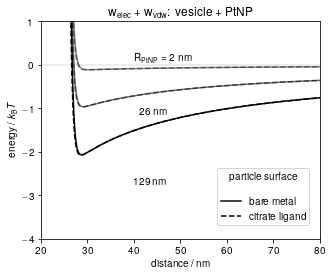

In [25]:
# PtNPs with 100 nm OAV under 0.1 M NaCl.
# The two curves (bare metal and citrate-capped) overlap perfectly


# Vesicle (100 nm diameter) - platinum nanoparticles (3 different PtNP sizes). experimental particles were citrate-capped.
# 0.16 nm2 per citrate (Sebastian Franco-Ulloa 2020, 'Dispersion state phase diagram of citrate-coated metallic nanoparticles in saline solutions')
# citrate ligands also stabilise nanoparticles by sterics: the area of the particle which is bare metal shrinks from 100% to roughly 70%, however this isn't reflected in the DLVO plots
# For citrate particles, 0.16 nm2 per citrate. Each citrate on average has 2.6 deprotonation state (so apc = 0.16/2.6)
# higher frequency component is weak due to high curvature of the small particles

## define an array of distances, d


d = np.arange(1,80+1,0.1)*1e-9

plt.figure(figsize = (5,4))

# print(min(wtot(d, 0.10, 1e-6, 0.62, A=10e-21))/k/T)
oav_diameter = 100e-9
for ptnp_diameter in np.array([257.2,51.3391,4.2374])/(1e9):
    ws_citrate = wtot12(d, 0.1, oav_obj.apc, pt_citrate_obj.apc, oav_diameter/2, ptnp_diameter/2, A=A12_metal)
    ws_bare = wtot12(d, 0.1, oav_obj.apc, pt_obj.apc, oav_diameter/2, ptnp_diameter/2, A=A12_metal)
    
    #citrate
    print(ptnp_diameter*10**9, ' nm, citrate')
    welec_cit = welec12(28e-9, 0.1, oav_obj.apc, pt_citrate_obj.apc, oav_diameter/2, ptnp_diameter/2, A=A12_metal)
    wvdw_cit = wvdw12(28e-9, 0.1, oav_obj.apc, pt_citrate_obj.apc, oav_diameter/2, ptnp_diameter/2, A=A12_metal)
    print('welec = ', f'{welec_cit:.2e}')
    print('wvdw = ', f'{wvdw_cit:.2e}')
    print('wtot = ', f'{welec_cit + wvdw_cit:.2e}')
    
    #bare
    print(ptnp_diameter*10**9, ' nm, bare')
    welec_bare = welec12(28e-9, 0.1, oav_obj.apc, pt_obj.apc, oav_diameter/2, ptnp_diameter/2, A=A12_metal)
    wvdw_bare = wvdw12(28e-9, 0.1, oav_obj.apc, pt_obj.apc, oav_diameter/2, ptnp_diameter/2, A=A12_metal)
    print('welec = ', f'{welec_bare:.2e}')
    print('wvdw = ', f'{wvdw_bare:.2e}')
    print('wtot = ', f'{welec_bare + wvdw_bare:.2e}')
    print()
    """
    salt is in M
    Ds is the distance in metres
    R0 is the radius in metres
    apc is the area per charge in nm^2
    A is the Hamaker constant in J
    """
    plt.plot(d*1e9, ws_bare/k/T,'k',alpha=abs((ptnp_diameter + 230e-9)/500e-9),zorder=3)
    plt.plot(d*1e9, ws_citrate/k/T,'k',alpha=abs((ptnp_diameter + 230e-9)/500e-9),linestyle='dashed',zorder=3)

    # print(As, wtot(6e-9, 0.15, 1e-6, 0.62, A=As)/k/T)

plt.xlim(20,80)
# plt.xlim(26,30)

plt.ylim(-4,1)
plt.xlabel('distance / nm')
plt.ylabel(r'energy / $k_{\mathrm{B}}T$')
plt.title('$\mathrm{w_{elec}} + \mathrm{w_{vdw}}$: vesicle + PtNP') 

plt.annotate(r"R$_{\mathrm{PtNP}}$ = 2 nm", (40,0.1))
plt.annotate(r"26 nm", (40,-1.1),xytext=(41,-1.15))
plt.annotate(r"129 nm", (40,-3),xytext=(40,-2.75))

plt.plot(d*1e9, d**0*0, 'k-',alpha=0.5,linewidth=0.3,zorder=1) # plot where 0 is
plt.legend(["bare metal","citrate ligand"], loc ="lower right",bbox_to_anchor=(0.98, 0.04),title='particle surface \n')

# plt.savefig('DLVO_vesicle_PtNP.svg', format='svg', dpi=1200,bbox_inches='tight')

#caption: negative = attraction; positive = repulsion


In [26]:
# A is the Hamaker constant that depends on the polarizability of nanoparticle and surrounding medium.
# The steric repulsion depends on both ligand-solvent and ligand-ligand interactions.
# In a good solvent, Usteric can be calculated by employing de Gennes’ expression
# Si K.J. (2018) Nanoparticle Superlattices: The Roles of Soft Ligands